# Activation Functions

Activation functions play a crucial role in the architecture of neural networks. It adds non-linearity to the system, also it is possible to calculate the gradient which is crucial when doing Backprop. Choosing an activation function is crucial for gradient stability. In this notebook different activation functions will be presented.

Activation Functions in this notebook:
- Identity Function
- Binary Step
- Sigmoid / Logistic
- Tanh
- ReLU
- Leaky ReLU
- ELU

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Preparation

In [2]:
x = np.arange(-3, 3, 0.01)

In [36]:
def plot_function(x, y, func_name):    
    plt.figure(figsize=(7, 5))
    plt.plot(x, y, c='r')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(func_name)
    plt.show()

# Identity Function

The identity function that always returns the exact same value that was used as input: $f(X) = X$. However, this function is not used in modern Machine Learning-Models.

In [4]:
def identity_function(x):
    return x

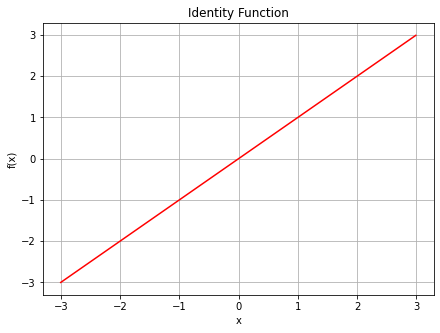

In [5]:
y = identity_function(x)
plot_function(x, y, 'Identity Function')

# Binary-Step Function

The Binary-Step or unit step function is also one of the most basic ones. For example it was used in the perceptron by Frank Rosenblatt back in 1957.

$$
f(x) = \left\{
    \begin{array}\\
        1 & \mbox{if } \ x \geq \mathbf{0} \\
        0 & \mbox{else.}
    \end{array}
\right.
$$

In [6]:
def binarystep_function(x):
    y = []
    for i in x:
        if i < 0:
            y.append(0)
        elif i >= 0:
            y.append(1)
    return y

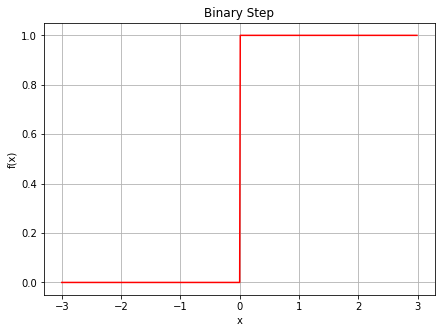

In [7]:
y = binarystep_function(x)
plot_function(x, y, 'Binary Step')

# Sigmoid Function

At first the Sigmoid Function(logisitc function) was one of the most popular activation functions as it is non-linear and thus allows to find non-linear relationships. Sometimes the Sigmoid-Function is also referred as the squashing function. The name comes from the fact that it "squashes" the input into numbers between 0 and 1.

$Sigmoid(x) = \frac1 {1 + e^{-x}}$

In [8]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

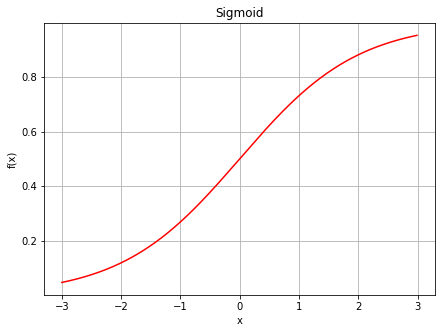

In [9]:
y = sigmoid_function(x)
plot_function(x, y, 'Sigmoid')

# Tanh Function - (Tangens hyperbolicus)
The Tangens Hyperbolicus - Tanh function is also s-shaped but it differs to the Sigmoid-Function as it has output values between -1 and 1.

In [10]:
def tanh_function(x):
    return 2 / (1 + np.exp(-2 * x)) -1

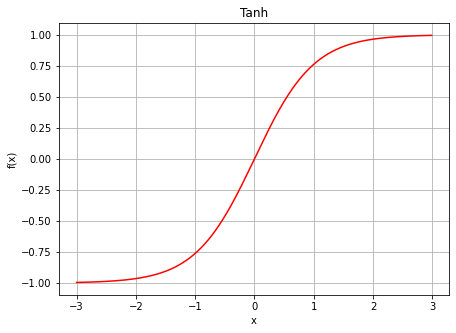

In [11]:
y = tanh_function(x)
plot_function(x, y, 'Tanh')

# ReLU - (Rectified Linear Unit)

Recently one of the most popular activation functions. $ReLu(x) = max(0, x)$

In [12]:
def relu_function(x):
    return np.maximum(0.0, x)

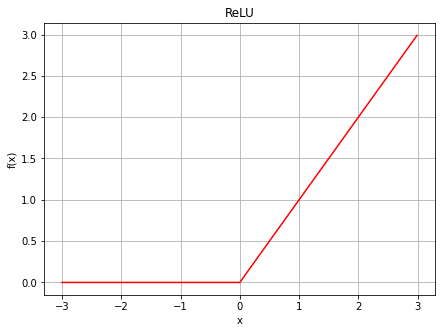

In [13]:
y = relu_function(x)
plot_function(x, y, 'ReLU')

# Leaky ReLU

One of the main drawbacks of the vanilla ReLU function is caused by so-called "dying ReLU" - which means that during training at one point some neurons will only output 0. This results when the weighted sum of the input is negative. Hence only 0 is the output. Then there is no use in calculating gradient since the gradient of negative values of ReLU is 0.

To counter this problem Leaky ReLU comes in. $LeakyReLU_{\alpha}(x) = max(\alpha x, x)$

Here $\alpha$ is a hyperparameter that defines how much the function leaks and it corresponds to the slope of the function where x < 0. A good starting point for $\alpha$ could be 0.01 or even 0.2

Calculating the gradient will be a non-zero value. This prevents dying ReLU.

Interesting article about (Leaky)ReLU: https://arxiv.org/abs/1505.00853 

LeakyReLU can even be expanded into **randomized LeakyReLU** - where $\alpha$ will be defined based on a predefined range during training. While it will be set on an average value during testing.

Another approach is **parametrized LeakyReLU** - Here $\alpha$ will be learned during training (it will be modified via Backprop).

In [46]:
def leaky_relu_function(x):
    return np.maximum(0.2*x, x) # alpha=0.2

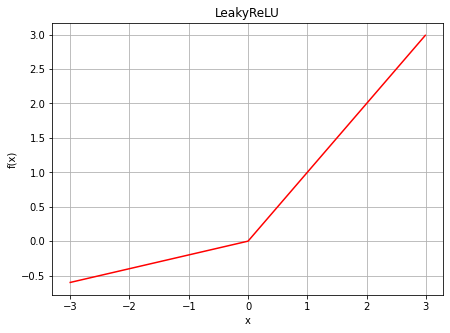

In [42]:
y = leaky_relu_function(x)
plot_function(x, y, 'LeakyReLU')

# ELU - (Exponential Linear Unit)

At first glance this function looks quite similar to ReLU, however, there are some significant differences. First, it takes negative values when x < 0 and the hyperparameter $\alpha$ is defined as the value which the ELU-Function given a negative value returns(usually $\alpha = 1$. Given that, the gradient for x < 0 is a non-zero value thus avoiding "dying neurons". Computational time might be more intensive caused by the exponential component of the function. However, very good results can be achieved.

$$
ELU_{\alpha}(x) = \left\{
    \begin{array}\\
        \alpha(e^{2}-1)& \mbox{if } \ x \lt \mathbf{0} \\
        x & \mbox{if } \ x \geq \mathbf{0} \\
    \end{array}
\right.
$$

Article: https://arxiv.org/abs/1511.07289

The SELU (standardised ELU) takes it one step further.

In [45]:
def elu_function(x):
    return np.maximum(1*np.exp(x)-1, x) # alpha=1

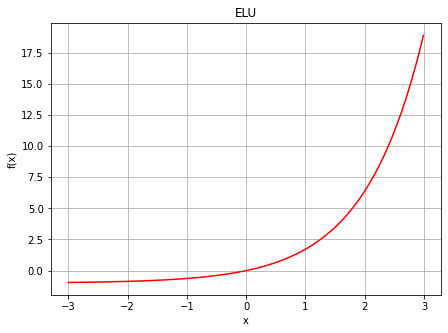

In [44]:
y = elu_function(x)
plot_function(x, y, 'ELU')